# 1. Import library

นำเข้า  library ที่จะใช้งานโดยใช้คำสั่ง ดังนี้

In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("max_rows", None)
pd.options.display.max_colwidth = None
%matplotlib inline

# 2. Data

##dataset 1 : Booking_nobeforeprice


นำเข้าไฟล์ CSV ที่ชื่อ 'Booking_nobeforeprice'

In [ ]:
data = pd.read_csv('/content/Booking_nobeforeprice.CSV')
data

,Unnamed: 0,name,location,distance,room_type,score,rank,review_count,type,price_after_discount
0,0,The Residence Hotel -SHA Plus,เชียงใหม่,2.3 กม. จากย่านใจกลาง,ห้องสุพีเรียร์เตียงใหญ่,7.1,ดี,37 ความคิดเห็นจากผู้เข้าพัก,1 คืน ผู้ใหญ่ 2 ท่าน,THB 683
1,1,FrenTé Chiang Mai,"Si Phum, เชียงใหม่",0.9 กม. จากย่านใจกลาง,ห้องเตียงใหญ่ราคาประหยัด,7.4,ดี,26 ความคิดเห็นจากผู้เข้าพัก,1 คืน ผู้ใหญ่ 2 ท่าน,THB 284
2,2,Akyra Manor Chiang Mai Sha Plus,"นิมมานเหมินทร์, เชียงใหม่",1.5 กม. จากย่านใจกลาง,ห้องดีลักซ์เตียงใหญ่หรือเตียงแฝด,9.1,ดีเลิศ,167 ความคิดเห็นจากผู้เข้าพัก,1 คืน ผู้ใหญ่ 2 ท่าน,"THB 3,301"
3,3,เชียงใหม่ไทยเฮ้าส์ ท่าแพ,"ช้างม่อย, เชียงใหม่",1.5 กม. จากย่านใจกลาง,ห้องมาตรฐานสำหรับครอบครัวพร้อมพัดลม,8.5,ดีมาก,364 ความคิดเห็นจากผู้เข้าพัก,1 คืน ผู้ใหญ่ 2 ท่าน,THB 819
4,4,ViangNgam LanNa Villa Resort,"ช้างเผือก, เชียงใหม่",2.9 กม. จากย่านใจกลาง,ห้องเตียงใหญ่พร้อมวิวสระน้ำ,8.4,ดีมาก,15 ความคิดเห็นจากผู้เข้าพัก,1 คืน ผู้ใหญ่ 2 ท่าน,"THB 1,199"
5,5,พ่อเลี้ยงหมื่น เทอร์ราคอตตา อาร์ต,"Phra Sing, เชียงใหม่",1.2 กม. จากย่านใจกลาง,ดีลักซ์เตียงใหญ่มีระเบียง,9.3,ดีเลิศ,510 ความคิดเห็นจากผู้เข้าพัก,1 คืน ผู้ใหญ่ 2 ท่าน,"THB 1,696"
6,6,โรงแรม แอทพิงค์นคร เชียงใหม่,"นิมมานเหมินทร์, เชียงใหม่",2.1 กม. จากย่านใจกลาง,ห้องสุพีเรียร์เตียงใหญ่,8.8,ยอดเยี่ยม,609 ความคิดเห็นจากผู้เข้าพัก,1 คืน ผู้ใหญ่ 2 ท่าน,"THB 1,043"
7,7,โรงแรมยางคำ วิลเลจ,"ช้างคลาน, เชียงใหม่",2.3 กม. จากย่านใจกลาง,ห้องสุพีเรียร์เตียงใหญ่หรือเตียงแฝด,9.1,ดีเลิศ,203 ความคิดเห็นจากผู้เข้าพัก,1 คืน ผู้ใหญ่ 2 ท่าน,"THB 2,078"
8,8,The Empress Premier Chiang Mai - SHA plus,"ช้างคลาน, เชียงใหม่",2.7 กม. จากย่านใจกลาง,ห้องพรีเมียร์,9.6,แสนวิเศษ,356 ความคิดเห็นจากผู้เข้าพัก,1 คืน ผู้ใหญ่ 2 ท่าน,"THB 2,117"
9,9,De Chai Colonial Hotel & Spa - SHA,"ช้างม่อย, เชียงใหม่",1.5 กม. จากย่านใจกลาง,ห้องดีลักซ์ (เฉพาะห้องพัก),8.8,ยอดเยี่ยม,141 ความคิดเห็นจากผู้เข้าพัก,1 คืน ผู้ใหญ่ 2 ท่าน,"THB 1,216"


### Cleaning dataset 1

* สร้าง function สำหรับสกัดเฉพาะตัวเลขมาจาก text โดยใช้คำสั่ง re.findall หาข้อมูลตัวเลข 0-9, คำสั่ง re.sub เพื่อลบ ' , ' ออก และกำหนดค่าข้อมูลเป็น float โดยที่ให้ค่าออกมาเป็น score

In [ ]:
def convert_number(text):
    score = re.findall(r'[0-9]+.',text)
    score=''.join(score)
    score = re.sub(r',','',score)
    score=float(score)
    return score

* ระยะห่างจากย่านใจกลาง (Distance) จะไม่เกิน 100 กิโลเมตร (ถ้าเกินจาก 100 km. จะไม่อยู่ในเขตของจ.เชียงใหม่)
 * เนื่องจากข้อมูลบางตัวในคอลัมน์ Distance เป็นเมตร จึงกำหนดให้หารด้วย 1,000 เพื่อแปลงเป็นกิโลเมตรกำหนด function ชื่อ km_check

In [ ]:
def km_check(text):
    if text>100:
        text=text/1000
    else:
        text=text
    return text

* Convert number : เก็บข้อมูลเฉพาะที่เป็นตัวเลขเท่านั้น (ลบตัวอักษรทิ้ง)
 * ได้แก่ คอลัมน์ Distance, Review_count, และ Price_after_discount
* km_check : เพื่อแปลงข้อมูลจาก m เป็น km
* ลบคอลัมน์ Unnamed ทิ้ง (เนื่องจากมี Index กำหนดให้อยู่แล้ว)

In [ ]:
df=pd.read_csv('/content/Booking_nobeforeprice.CSV')
df.distance=df.distance.apply(convert_number)
df.distance=df.distance.apply(km_check)
df['review_count']=df['review_count'].apply(convert_number)
df.price_after_discount=df.price_after_discount.apply(convert_number)
del df['Unnamed: 0']
df

,name,location,distance,room_type,score,rank,review_count,type,price_after_discount
0,The Residence Hotel -SHA Plus,เชียงใหม่,2.3,ห้องสุพีเรียร์เตียงใหญ่,7.1,ดี,37.0,1 คืน ผู้ใหญ่ 2 ท่าน,683.0
1,FrenTé Chiang Mai,"Si Phum, เชียงใหม่",0.9,ห้องเตียงใหญ่ราคาประหยัด,7.4,ดี,26.0,1 คืน ผู้ใหญ่ 2 ท่าน,284.0
2,Akyra Manor Chiang Mai Sha Plus,"นิมมานเหมินทร์, เชียงใหม่",1.5,ห้องดีลักซ์เตียงใหญ่หรือเตียงแฝด,9.1,ดีเลิศ,167.0,1 คืน ผู้ใหญ่ 2 ท่าน,3301.0
3,เชียงใหม่ไทยเฮ้าส์ ท่าแพ,"ช้างม่อย, เชียงใหม่",1.5,ห้องมาตรฐานสำหรับครอบครัวพร้อมพัดลม,8.5,ดีมาก,364.0,1 คืน ผู้ใหญ่ 2 ท่าน,819.0
4,ViangNgam LanNa Villa Resort,"ช้างเผือก, เชียงใหม่",2.9,ห้องเตียงใหญ่พร้อมวิวสระน้ำ,8.4,ดีมาก,15.0,1 คืน ผู้ใหญ่ 2 ท่าน,1199.0
5,พ่อเลี้ยงหมื่น เทอร์ราคอตตา อาร์ต,"Phra Sing, เชียงใหม่",1.2,ดีลักซ์เตียงใหญ่มีระเบียง,9.3,ดีเลิศ,510.0,1 คืน ผู้ใหญ่ 2 ท่าน,1696.0
6,โรงแรม แอทพิงค์นคร เชียงใหม่,"นิมมานเหมินทร์, เชียงใหม่",2.1,ห้องสุพีเรียร์เตียงใหญ่,8.8,ยอดเยี่ยม,609.0,1 คืน ผู้ใหญ่ 2 ท่าน,1043.0
7,โรงแรมยางคำ วิลเลจ,"ช้างคลาน, เชียงใหม่",2.3,ห้องสุพีเรียร์เตียงใหญ่หรือเตียงแฝด,9.1,ดีเลิศ,203.0,1 คืน ผู้ใหญ่ 2 ท่าน,2078.0
8,The Empress Premier Chiang Mai - SHA plus,"ช้างคลาน, เชียงใหม่",2.7,ห้องพรีเมียร์,9.6,แสนวิเศษ,356.0,1 คืน ผู้ใหญ่ 2 ท่าน,2117.0
9,De Chai Colonial Hotel & Spa - SHA,"ช้างม่อย, เชียงใหม่",1.5,ห้องดีลักซ์ (เฉพาะห้องพัก),8.8,ยอดเยี่ยม,141.0,1 คืน ผู้ใหญ่ 2 ท่าน,1216.0


เรียกดูข้อมูล สถานที่ตั้ง (Location) ของสถานประกอบการที่พักแรม เพื่อดูว่าส่วนใหญ่ตั้งอยู่ตรงไหนของจ.เชียงใหม่

In [ ]:
df.location.value_counts()

Si Phum, เชียงใหม่                 194
เชียงใหม่                          112
นิมมานเหมินทร์, เชียงใหม่           83
ช้างเผือก, เชียงใหม่                77
ช้างม่อย, เชียงใหม่                 69
Phra Sing, เชียงใหม่                67
หายยา, เชียงใหม่                    66
ช้างคลาน, เชียงใหม่                 47
วัดเกต, เชียงใหม่                   24
Tha Sala, เชียงใหม่                 15
San Phi Suea, เชียงใหม่              9
Nong Pa Khrang, เชียงใหม่            8
Fa Ham, เชียงใหม่                    5
Huay Kaew, เชียงใหม่                 4
Chiang Mai Riverside, เชียงใหม่      3
Name: location, dtype: int64

### Plot graph dataset 1

* ทำ Pairplot เพื่อดูกราฟคร่าวๆ 
 * เมื่อดูกราฟที่กำหนด Price_after_discount ให้เป็นแกน y และกำหนด Distance, Score, และ Review_count ให้เป็นแกน x พบว่า Correlation ไม่ค่อยเป็นเส้นตรง 

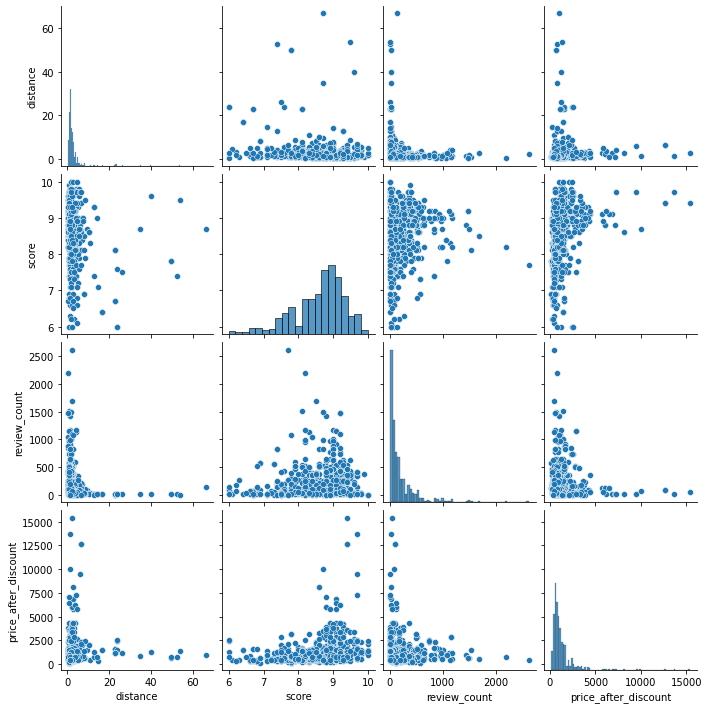

In [ ]:
sns.pairplot(df)

* Test correlation อีกรอบ โดยใช้ Seaborn
 * ใช้ lmplot เพื่อดูความสัมพันธ์เชิงเส้นของตัวแปร พบว่าไม่ค่อยเป็นเส้นตรง

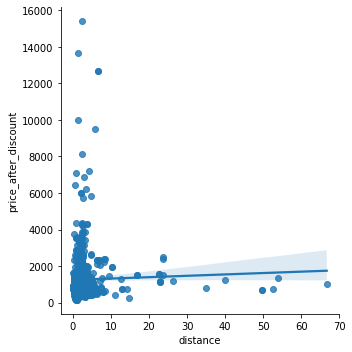

In [ ]:
sns.lmplot(data=df, x="distance", y="price_after_discount")

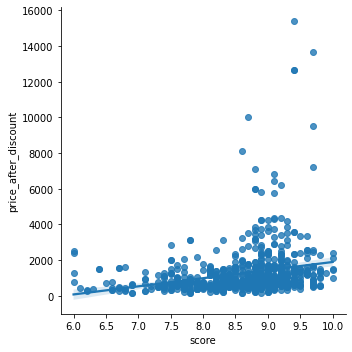

In [ ]:
sns.lmplot(data=df, x="score", y="price_after_discount")

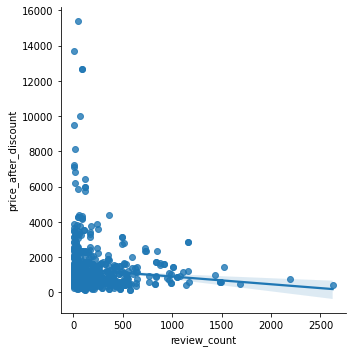

In [ ]:
sns.lmplot(data=df, x="review_count", y="price_after_discount")

 * Test correlation
  * ใช้ heatmap เพื่อดูค่า Correlation พบว่า Price_after_discount กับ Distance, Score, และ Review_count มีความสัมพันธ์กันค่อนข้างน้อย
  * จาก heatmap จะพบว่าระยะทางยิ่งไกล (Distance) - ราคายิ่งแพง (Price_after_discount), คะแนนจากผู้เข้าพักมาก (Score) - ราคายิ่งแพง (Price_after_discount), รีวิวจากผู้เข้าพักมาก (Review_count) - ราคายิ่งถูก (Price_after_discount)

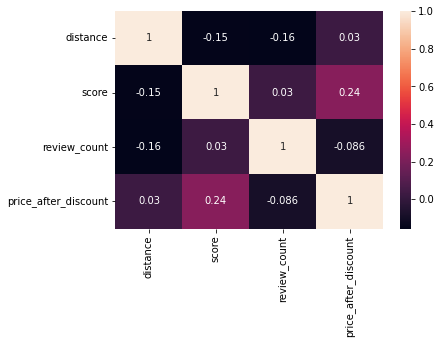

In [ ]:
sns.heatmap(df.corr(), annot=True)

### Model with dataset1

กำหนด x กับ y โดยให้ X คือ Distance, Review_count, Score และ y คือ Price_after_discount

In [ ]:
X = df[['distance','review_count','score']]
y = df['price_after_discount']

แบ่งข้อมูลโดย train_test_split เป็น train : test = 80 : 20 และกำหนดค่า random_state เพื่อ run แล้วให้ค่าคงที่

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* สร้างฟังก์ชั่น cross_val สำหรับดูค่า Cross Validation โดยที่ให้ค่าเป็น ค่าเฉลี่ยของ cross validation
* สร้างฟังก์ชั่น print_evaluate  โดยจะแสดงค่า Mean Absolute Error, Mean Squared Error, Root Mean Squared Error และ R2 Square
* สร้างฟังก์ชั่น evaluate เก็บค่า Mean Absolute Error, Mean Squared Error, Root Mean Squared Error และ R2 Square โดยที่ให้ค่าเป็น MAE, MSE, RMSE และ R2_square ตามลำดับ


In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model,X,y):
    pred = cross_val_score(model, X, y)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('mean absolute error ::', mae)
    print('mean squared error:', mse)
    print('root mean squared error:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

ใช้ Linear Regression ในการทำ Model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

ใช้ Linear Regression ในการทำนายค่า X_test และ X_train แล้วเรียกใช้ฟังก์ชั่น print_evaluate เพื่อดูค่าต่างๆ ซึ่งจะพบว่ามีค่าคลาดเคลื่อนที่มากเกินไป
* จากการดูค่า R2 Square จะพบว่าตัวแปรแทบไม่สัมพันธ์กัน

In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
mean absolute error :: 715.9092423055893
mean squared error: 1491063.2675426628
root mean squared error: 1221.0910152575289
R2 Square 0.004704714899807505
__________________________________
Train set evaluation:
_____________________________________
mean absolute error :: 751.3576949828733
mean squared error: 1882859.0659499748
root mean squared error: 1372.1731180685529
R2 Square 0.07757989937030585
__________________________________


## dataset 2 : Booking_facilityandscore

นำเข้าไฟล์ CSV ที่ชื่อ 'Booking_facilityandscore'

In [ ]:
data_2 = pd.read_csv('/content/Booking_facilityandscore.CSV')

In [ ]:
data_2

,Unnamed: 0,name,main_facility,employee_score,facility_score,clean_score,comfort_score,value_score,location_score,wifi_score,main_facility_count
0,0,ยูรานาบูติคโฮเทล,"['1 สระว่ายน้ำ', 'รวมบริการอินเทอร์เน็ตไร้สาย (Wi-Fi) ฟรี', 'ที่จอดรถฟรี', 'ห้องสำหรับครอบครัว', 'รถรับส่งสนามบิน', 'ห้องปลอดบุหรี่']",8.1,7.0,7.4,7.3,7.3,8.8,5.9,6
1,1,The Residence Hotel -SHA Plus,"['รวมบริการอินเทอร์เน็ตไร้สาย (Wi-Fi) ฟรี', 'ที่จอดรถฟรี', 'ห้องสำหรับครอบครัว', 'รถรับส่งสนามบิน', 'ห้องปลอดบุหรี่', 'ห้องอาหาร/ภัตตาคาร']",7.4,7.3,7.0,7.5,6.9,7.3,2.5,6
2,2,FrenTé Chiang Mai,"['ที่จอดรถฟรี', 'ห้องสำหรับครอบครัว']",8.6,7.5,7.9,7.9,8.3,8.3,NaN,2
3,3,Akyra Manor Chiang Mai Sha Plus,"['1 สระว่ายน้ำ', 'รวมบริการอินเทอร์เน็ตไร้สาย (Wi-Fi) ฟรี', 'ที่จอดรถฟรี', 'รถรับส่งสนามบิน', 'ห้องปลอดบุหรี่', 'บาร์']",9.5,9.3,9.4,9.4,8.6,9.2,9.1,6
4,4,ViangNgam LanNa Villa Resort,"['1 สระว่ายน้ำ', 'รวมบริการอินเทอร์เน็ตไร้สาย (Wi-Fi) ฟรี', 'ที่จอดรถฟรี', 'ห้องสำหรับครอบครัว', 'ห้องปลอดบุหรี่']",9.2,8.7,8.7,8.8,7.8,7.5,7.5,5
5,5,เชียงใหม่ไทยเฮ้าส์ ท่าแพ,"['1 สระว่ายน้ำ', 'รวมบริการอินเทอร์เน็ตไร้สาย (Wi-Fi) ฟรี', 'ที่จอดรถฟรี', 'ห้องสำหรับครอบครัว', 'ห้องปลอดบุหรี่']",8.8,8.2,8.6,8.1,8.3,9.3,8.3,5
6,6,Phoo Na Resort,"['1 สระว่ายน้ำ', 'รวมบริการอินเทอร์เน็ตไร้สาย (Wi-Fi) ฟรี', 'ที่จอดรถฟรี', 'รถรับส่งสนามบิน', 'ห้องปลอดบุหรี่', 'อุปกรณ์ชงชา/กาแฟในทุกห้องพัก']",9.3,9.5,9.5,9.5,9.5,8.6,NaN,6
7,7,โรงแรม แอทพิงค์นคร เชียงใหม่,"['รวมบริการอินเทอร์เน็ตไร้สาย (Wi-Fi) ฟรี', 'ที่จอดรถฟรี', 'รถรับส่งสนามบิน', 'ห้องปลอดบุหรี่', 'ห้องอาหาร/ภัตตาคาร', 'แผนกต้อนรับส่วนหน้า 24 ชั่วโมง']",9.3,8.8,8.8,8.8,8.9,8.7,8.4,6
8,8,ล้านนา ทรี บูติค โฮเทล,"['1 สระว่ายน้ำ', 'รวมบริการอินเทอร์เน็ตไร้สาย (Wi-Fi) ฟรี', 'ห้องปลอดบุหรี่', 'บริการรูมเซอร์วิส', 'สวนหย่อม', 'อุปกรณ์ชงชา/กาแฟในทุกห้องพัก']",8.9,8.2,8.9,8.6,8.2,9.0,7.9,6
9,9,โรงแรมเวียงมันตรา,"['รวมบริการอินเทอร์เน็ตไร้สาย (Wi-Fi) ฟรี', 'ห้องปลอดบุหรี่', 'แผนกต้อนรับส่วนหน้า 24 ชั่วโมง', 'บริการรูมเซอร์วิส', 'สวนหย่อม', 'ลานระเบียง', 'บาร์']",9.1,8.6,9.0,8.8,8.7,9.5,8.4,7


เรียกดูรายละเอียดข้อมูล เพื่อดูข้อมูลที่ null (เช่น มีข้อมูลสถานที่พักแรมทั้งหมด 939 แห่ง แต่สถานที่ที่มี WiFi มี 655 แห่ง แสดงว่าสถานที่พักแรมบางแห่งไม่มี WiFi)

In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           939 non-null    int64  
 1   name                 939 non-null    object 
 2   main_facility        939 non-null    object 
 3   employee_score       786 non-null    float64
 4   facility_score       786 non-null    float64
 5   clean_score          786 non-null    float64
 6   comfort_score        786 non-null    float64
 7   value_score          786 non-null    float64
 8   location_score       786 non-null    float64
 9   wifi_score           655 non-null    float64
 10  main_facility_count  939 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 80.8+ KB


### Cleaning dataset 2

* ลบคอลัมน์ Unnamed ทิ้ง (เนื่องจากมี Index กำหนดให้อยู่แล้ว)

In [ ]:
del data_2['Unnamed: 0']

# 3. Merge data

ทำการ merge data เพื่อรวมข้อมูลจากทั้ง 2 dataset เข้าด้วยกัน โดยใช้คอลัมน์ Name เป็น key หลัก เนื่องจาก name เป็น primary key

In [ ]:
merge_df=pd.merge(df,data_2, on='name')

เรียกดูรายละเอียดข้อมูลที่ merge ได้จำนวนสถานที่พักแรมทั้งสิ้น 737 แห่ง และมีข้อมูล 18 คอลัมน์



In [ ]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 736
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  737 non-null    object 
 1   location              737 non-null    object 
 2   distance              737 non-null    float64
 3   room_type             737 non-null    object 
 4   score                 737 non-null    float64
 5   rank                  737 non-null    object 
 6   review_count          737 non-null    float64
 7   type                  737 non-null    object 
 8   price_after_discount  737 non-null    float64
 9   main_facility         737 non-null    object 
 10  employee_score        737 non-null    float64
 11  facility_score        737 non-null    float64
 12  clean_score           737 non-null    float64
 13  comfort_score         737 non-null    float64
 14  value_score           737 non-null    float64
 15  location_score        7

แทนค่า Wifi_score ที่เป็น null ให้มีค่าเป็น 0 เนื่องจากที่พักที่ไม่มีคะแนน wifi คือที่พักที่ไม่มี wifi

In [ ]:
merge_df['wifi_score'] = merge_df['wifi_score'].fillna(0)

### Plot graph dataset 1&2 (merge dataset)

* ทำ Pairplot เพื่อดูกราฟคร่าวๆ 
 * เมื่อดูกราฟที่กำหนด Price_after_discount ให้เป็นแกน y และคอลัมน์อื่น เป็นแกน x พบว่า Correlation บางตัวเป็นเส้นตรง แต่มี Outlier

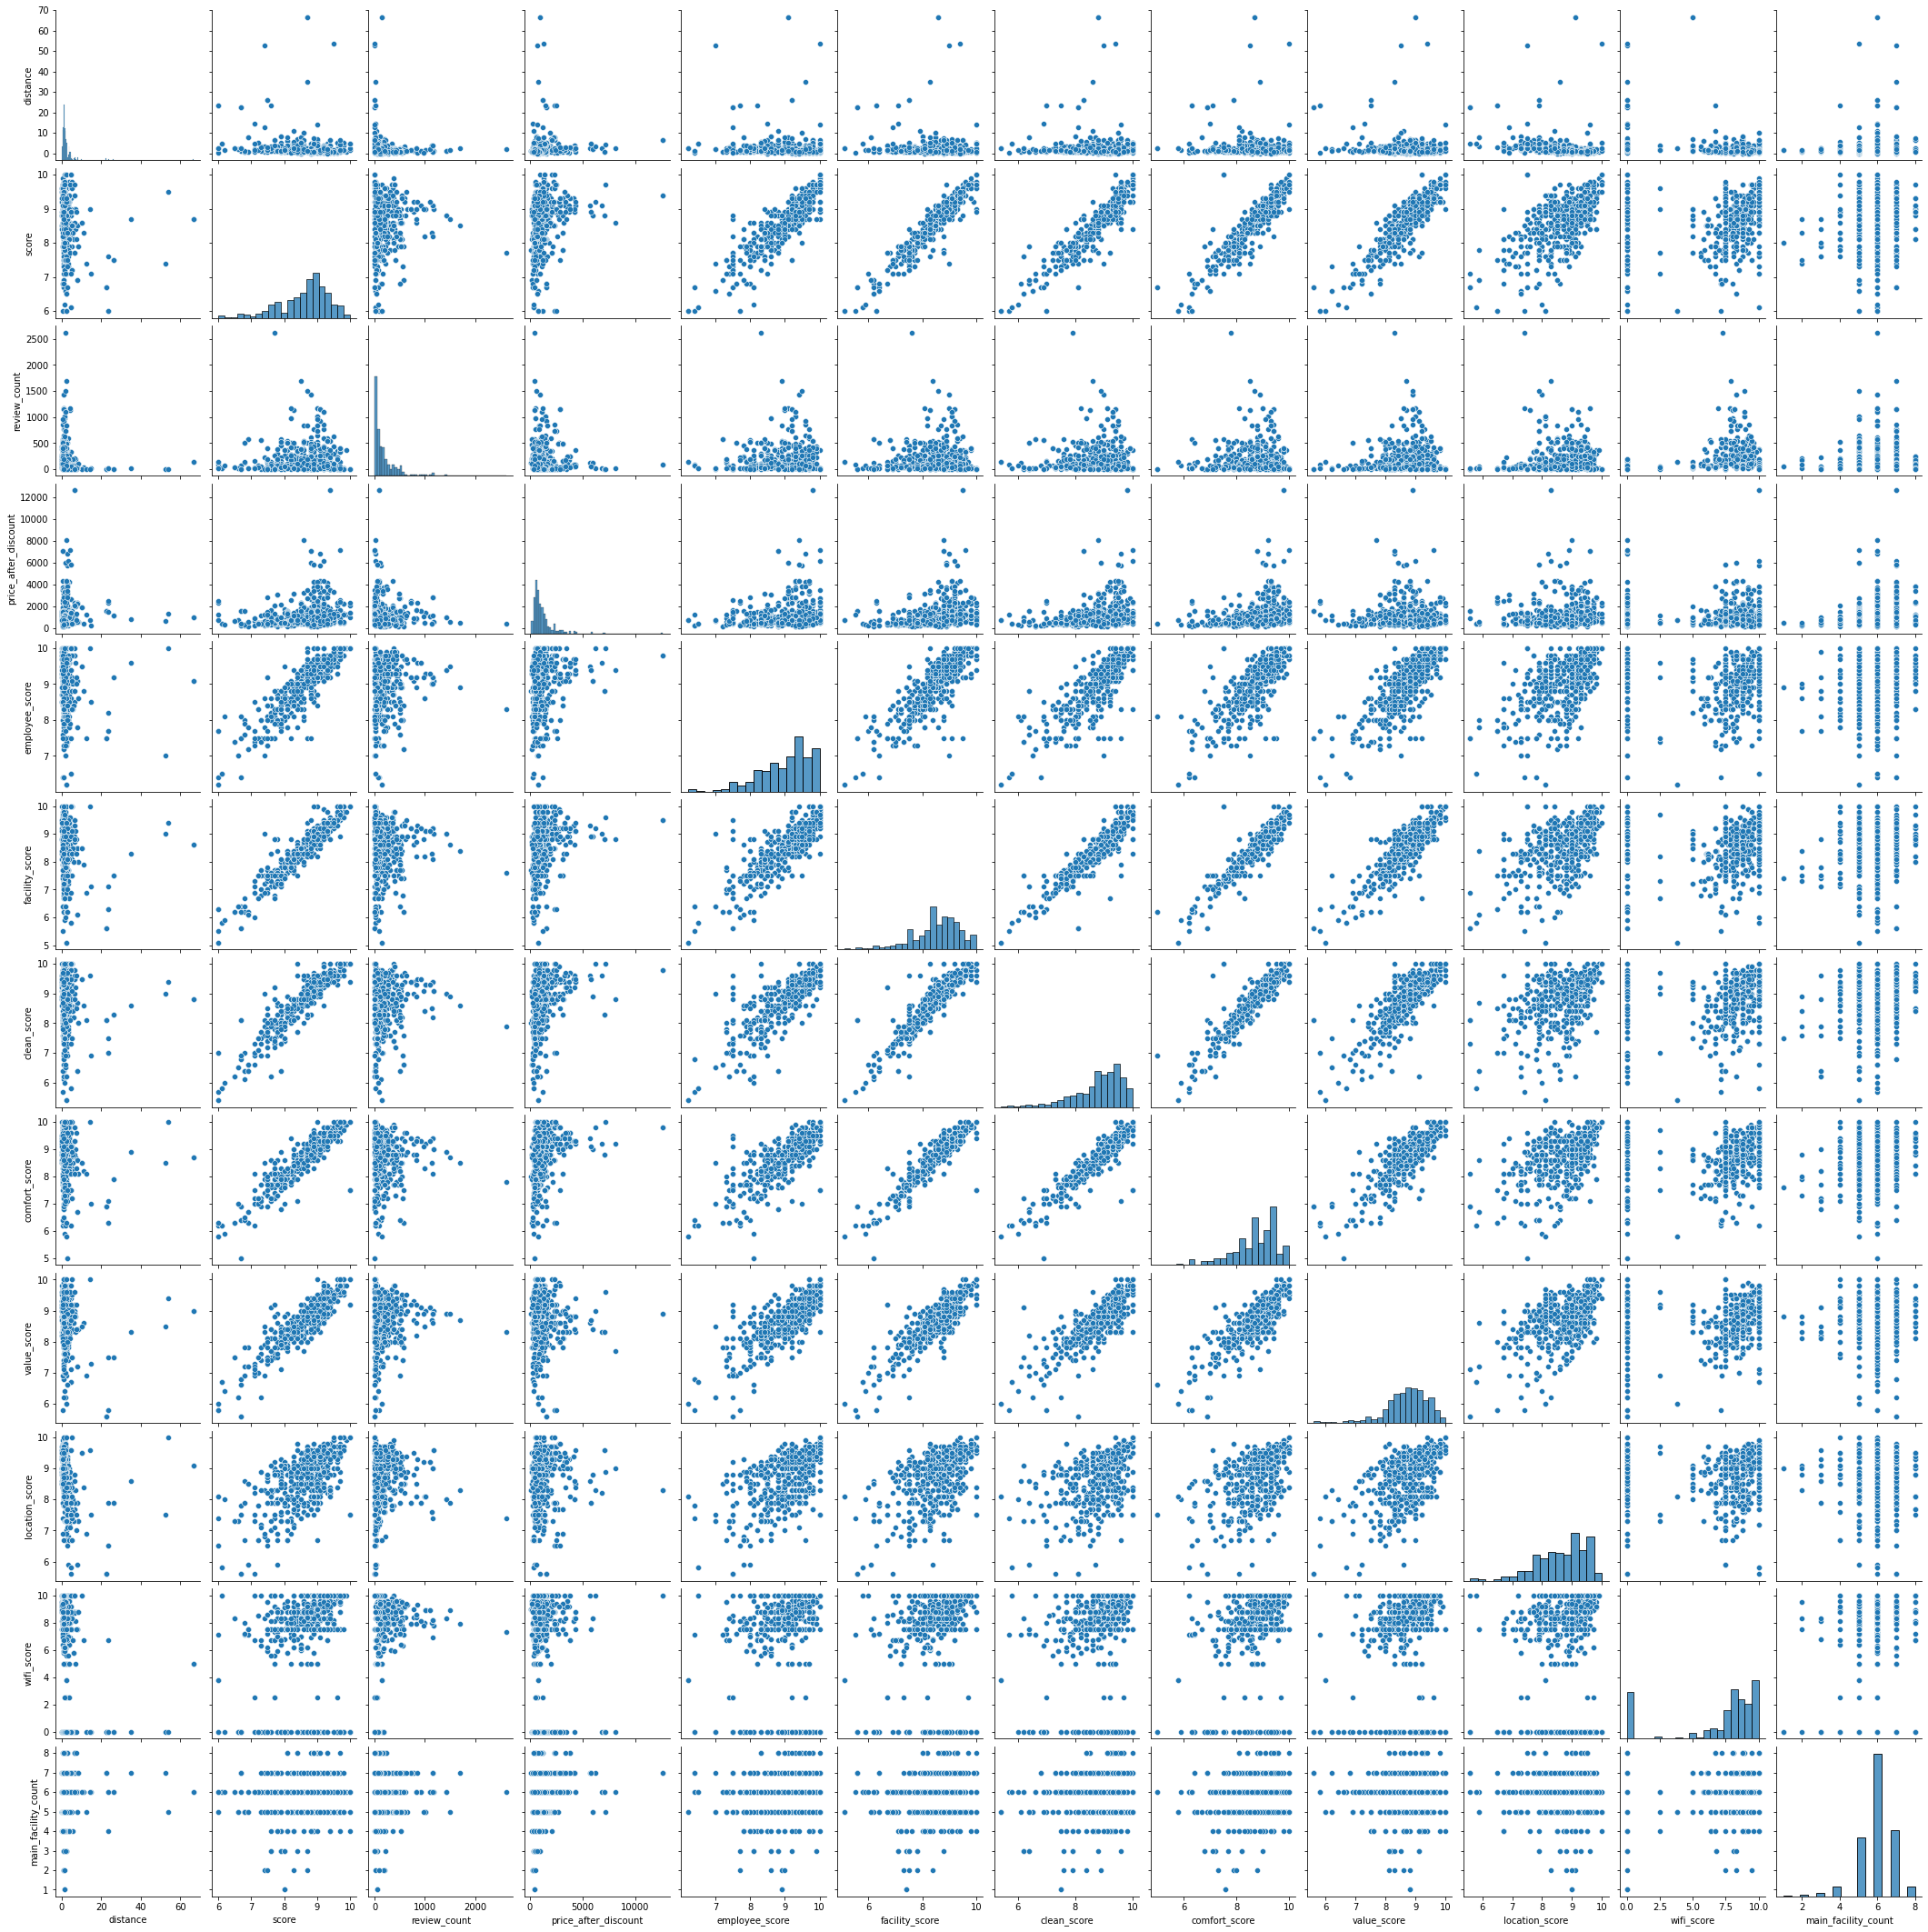

In [ ]:
sns.pairplot(merge_df)

* Test correlation
  * ใช้ heatmap เพื่อเช็คดู Correlation อีกรอบ พบว่า Price_after_discount กับคอลัมน์อื่น มีความสัมพันธ์กันบ้าง

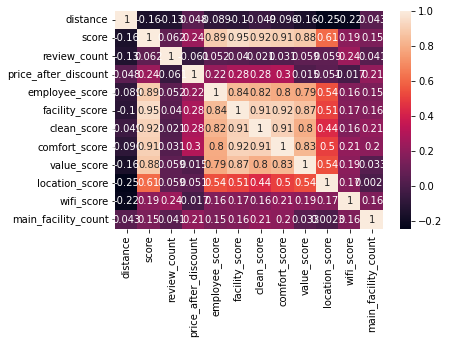

In [ ]:
sns.heatmap(merge_df.corr(), annot=True)

* จากตารางจะพบว่า รีวิวจากผู้เข้าพักมาก (Review_count) - ราคายิ่งถูก (Price_after_discount) อธิบายได้ยาก
* คะแนนต่างๆ จากผู้เข้าพักสูง (คอลัมน์ Employee_score ถึง Main_facility_count) - ราคายิ่งสูง (Price_after_discount) ซึ่งถือว่าสมเหตุสมผลกัน

In [ ]:
merge_df.corr()

,distance,score,review_count,price_after_discount,employee_score,facility_score,clean_score,comfort_score,value_score,location_score,wifi_score,main_facility_count
distance,1.000000,-0.155954,-0.134786,0.047629,-0.089385,-0.102805,-0.049405,-0.095902,-0.160172,-0.245813,-0.222083,0.042960
score,-0.155954,1.000000,0.062273,0.235539,0.892979,0.946518,0.920814,0.910297,0.883698,0.612457,0.191468,0.146646
review_count,-0.134786,0.062273,1.000000,-0.061148,0.051584,0.039729,0.020823,0.030847,0.058880,0.058514,0.239161,0.040666
price_after_discount,0.047629,0.235539,-0.061148,1.000000,0.219191,0.276587,0.280612,0.299380,0.015127,0.050977,-0.016590,0.208088
employee_score,-0.089385,0.892979,0.051584,0.219191,1.000000,0.841108,0.823630,0.795477,0.787360,0.544444,0.160348,0.145069
facility_score,-0.102805,0.946518,0.039729,0.276587,0.841108,1.000000,0.913556,0.921945,0.867135,0.509261,0.169051,0.160776
clean_score,-0.049405,0.920814,0.020823,0.280612,0.823630,0.913556,1.000000,0.913508,0.800963,0.435958,0.155123,0.208002
comfort_score,-0.095902,0.910297,0.030847,0.299380,0.795477,0.921945,0.913508,1.000000,0.832321,0.501533,0.208242,0.195892
value_score,-0.160172,0.883698,0.058880,0.015127,0.787360,0.867135,0.800963,0.832321,1.000000,0.541941,0.188140,0.033196
location_score,-0.245813,0.612457,0.058514,0.050977,0.544444,0.509261,0.435958,0.501533,0.541941,1.000000,0.173590,0.002262


# 4. Models with dataset1&2 (merge dataset)

### Linear Regression 

* แบ่งข้อมูลโดย train_test_split เป็น train : test = 80 : 20 โดยให้ X คือ ตัวแปรที่เป็นตัวเลขทั้งหมด คือ Distance, Score, Review_score, Facility_score, Clean_score, Comfort_score, Value_score, Location_score, Wifi_score, และ Main_facility_count  และ y คือ Price_after_discount


In [ ]:
X = merge_df[['distance','score','review_count','employee_score','facility_score','clean_score','comfort_score','value_score','location_score'
             ,'wifi_score','main_facility_count']]
y = merge_df['price_after_discount']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ใช้ linear regression หลังจากนั้น เรียกดูค่า MAE, MSE, RMSE, และ R2_square
* จากผลลัพธ์จะเห็นได้ว่า โมเดลมีค่าคลาดเคลื่อนลดลง ตัวแปรมีความสัมพันธ์กันมากขึ้นอย่างเห็นได้ชัด เทียบกับข้อมูลเก่า


In [ ]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('*** Linear Regression All Data ***')
print('Test set evaluation:\n_____________________________________\n')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________\n')
print_evaluate(y_train, train_pred)

*** Linear Regression All Data ***
Test set evaluation:
_____________________________________

mean absolute error :: 562.472739543145
mean squared error: 577169.0216886691
root mean squared error: 759.7164087267493
R2 Square 0.40044732847020215
__________________________________
Train set evaluation:
_____________________________________

mean absolute error :: 609.5138199397447
mean squared error: 1080474.3047362426
root mean squared error: 1039.458659464744
R2 Square 0.3186923484458928
__________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


* นำค่าที่ได้มาเก็บที่ DataFrame ที่สร้างขึ้นมาใหม่ ชื่อว่า ' results_df_not_select ' เพื่อเรียกดูค่าได้ง่ายขึ้น


In [ ]:
results_df_not_select = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression(),X_train,y_train)]], 
                          columns=['Model', 'Mean Absolute Error', 'Mean Square Error', 'Root Mean Square Error', 
                                   'R2 Square', "Cross Validation"])

### ขั้นตอนในการเลือก feature 
##### เลือกเพื่อแก้ไขปัญหา Multicollinearity ที่จะเกิดขึ้น เนื่องจาก Score บางตัวอาจเชื่อมโยงกัน เราจึงต้องทำการเลือก feature เพื่อไม่ให้ข้อมูล collinearity กันมากเกินไป หรือกล่าวคือไม่ให้ score มาเชื่อมกันมากเกินไป จนเกิดการแปรผันตาม (เช่น score ตัวหนึ่งมากขึ้น score อีกตัวอาจมากขึ้นตาม)

* Import statsmodels.api เพื่อดูค่าสถิติ

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


* กำหนดฟังก์ชันชื่อ ‘stepwise_selection’ โดยกำหนด initial_list ให้เป็น list ว่าง (“[ ]”) แล้วจะใส่ค่าของ feature ลงไป แล้วดูว่า หากใส่แล้ว ค่า p-value จะเป็นอย่างไร
* โดยกำหนด threshold ขึ้นมา 2 ตัว คือ threshold_in = 0.01 และ threshold_out = 0.05 
* ถ้าหากถึงค่า threshold_in ก็จะเก็บ และ จะนำออกหากถึงค่า threshold_out 
* ผลลัพธ์คือ ได้ทั้งหมด 3 feature ได้แก่ Comfort_score, Value_score, และ Facility_score



In [ ]:
 def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)


Add  comfort_score                  with p-value 9.98905e-17
Add  value_score                    with p-value 1.19873e-36
Add  facility_score                 with p-value 6.52414e-13
resulting features:
['comfort_score', 'value_score', 'facility_score']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()


* แบ่งข้อมูลโดย train_test_split เป็น train : test = 80 : 20 โดยให้ X คือ ตัวแปรที่ได้จากการทำ feature select คือ facility_score, comfort_score, value_score และ y คือ price_after_discount
* นำข้อมูลเข้าสู่โมเดล linear regression หลังจากนั้น เรียกดูค่า MAE, MSE, RMSE, และ R2_square
* จากผลลัพธ์จะเห็นได้ว่า โมเดลมีค่าคลาดเคลื่อนลดลง ตัวแปรมีความสัมพันธ์กันมากขึ้นเทืยบกับก่อนเลือก feature


In [ ]:
X_select = merge_df[['facility_score','comfort_score','value_score']]
y_select = merge_df['price_after_discount']
from sklearn.model_selection import train_test_split

X_train_select, X_test_select, y_train, y_test= train_test_split(X_select, y_select, test_size=0.2, random_state=42)
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_select,y_train)
test_pred = lin_reg.predict(X_test_select)
train_pred = lin_reg.predict(X_train_select)
print('*** Linear Regression Select Data ***')
print('Test set evaluation:\n_____________________________________\n')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________\n')
print_evaluate(y_train, train_pred)

*** Linear Regression Select Data ***
Test set evaluation:
_____________________________________

mean absolute error :: 538.4579580767337
mean squared error: 529805.0577170023
root mean squared error: 727.8770897047127
R2 Square 0.44964815191420826
__________________________________
Train set evaluation:
_____________________________________

mean absolute error :: 619.978864312668
mean squared error: 1114410.4856405165
root mean squared error: 1055.6564240511761
R2 Square 0.2972934316801208
__________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


* นำค่าที่ได้มาเก็บที่ DataFrame ที่สร้างขึ้นมาใหม่ ชื่อว่า ' results_df_select ' เพื่อเรียกดูค่าได้ง่ายขึ้น

In [ ]:
results_df_select = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression(),X_train_select,y_train)]], 
                          columns=['Model', 'Mean Absolute Error', 'Mean Square Error', 'Root Mean Square Error', 
                                   'R2 Square', "Cross Validation"])
results_df_select

,Model,Mean Absolute Error,Mean Square Error,Root Mean Square Error,R2 Square,Cross Validation
0,Linear Regression,538.457958,529805.057717,727.87709,0.449648,0.270901


### Ridge Regression

* นำข้อมูลเข้าสู่โมเดล Ridge regression หลังจากนั้น เรียกดูค่า MAE, MSE, RMSE, และ R2_square
* จากผลลัพธ์จะเห็นได้ว่า โมเดลมีค่าใกล้เคียงกับ Linear Regression

In [ ]:
from sklearn.linear_model import Ridge
lm = Ridge()
lm.fit(X_train,y_train)
test_pred = lm.predict(X_test)
train_pred = lm.predict(X_train)

print('*** Ridge Regression All Data ***')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

*** Ridge Regression All Data ***
Test set evaluation:
_____________________________________
mean absolute error :: 562.9590392531811
mean squared error: 575353.9274741268
root mean squared error: 758.5208813698716
R2 Square 0.402332815293842
__________________________________
Train set evaluation:
_____________________________________
mean absolute error :: 608.6888822513769
mean squared error: 1080660.0208984627
root mean squared error: 1039.547988742445
R2 Square 0.3185752426139603
__________________________________


* นำค่าที่ได้มาเก็บที่ DataFrame ที่สร้างขึ้นมาใหม่ ชื่อว่า ' results_df_add '  แล้วเก็บเข้า DataFrame ของ ' results_df_not_select ' ได้เลย

In [ ]:
results_df_add = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge(),X_train,y_train)]], 
                          columns=['Model', 'Mean Absolute Error', 'Mean Square Error', 'Root Mean Square Error', 
                                   'R2 Square', "Cross Validation"])
results_df_not_select = results_df_not_select.append(results_df_add, ignore_index=True)

### Ridge Regression with Feature Selected

* นำข้อมูลเข้าสู่โมเดล Ridge Regression หลังจากนั้น เรียกดูค่า MAE, MSE, RMSE, และ R2_square
* จากผลลัพธ์จะเห็นได้ว่า โมเดลมีค่าใกล้เคียงกับ Linear Regression


In [ ]:
lm = Ridge()
lm.fit(X_train_select,y_train)
test_pred = lm.predict(X_test_select)
train_pred = lm.predict(X_train_select)

print('*** Ridge Regression Select Data ***')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

*** Ridge Regression Select Data ***
Test set evaluation:
_____________________________________
mean absolute error :: 539.481926569187
mean squared error: 529626.2729522642
root mean squared error: 727.7542668732792
R2 Square 0.4498338702727819
__________________________________
Train set evaluation:
_____________________________________
mean absolute error :: 618.8799746843001
mean squared error: 1114519.4064930854
root mean squared error: 1055.7080119488937
R2 Square 0.2972247501668782
__________________________________


* นำค่าที่ได้มาเก็บที่ DataFrame ที่สร้างขึ้นมาใหม่ ชื่อว่า ' results_df_add '  แล้วเก็บเข้า DataFrame ของ ' results_df_select ' ได้เลย

In [ ]:
results_df_add = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge(),X_train_select,y_train)]], 
                          columns=['Model', 'Mean Absolute Error', 'Mean Square Error', 'Root Mean Square Error', 
                                   'R2 Square', "Cross Validation"])
results_df_select = results_df_select.append(results_df_add, ignore_index=True)

### Lasso Regression

* นำข้อมูลเข้าสู่โมเดล Lasso Regression หลังจากนั้น เรียกดูค่า MAE, MSE, RMSE, และ R2_square
* จากผลลัพธ์จะเห็นได้ว่า โมเดลมีค่าใกล้เคียงกับ Linear Regression และ Ridge Regression


In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
mean absolute error :: 561.7030022666753
mean squared error: 574712.9465726805
root mean squared error: 758.0982433515333
R2 Square 0.4029986545842761
__________________________________
Train set evaluation:
_____________________________________
mean absolute error :: 608.679559925517
mean squared error: 1080609.3237390772
root mean squared error: 1039.5236042241067
R2 Square 0.31860721039186124
__________________________________


* นำค่าที่ได้มาเก็บที่ DataFrame ที่สร้างขึ้นมาใหม่ ชื่อว่า ' results_df_add '  แล้วเก็บเข้า DataFrame ของ ' results_df_not_select ' ได้เลย

In [ ]:
results_df_add= pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso(random_state=42),X_train,y_train)]], 
                          columns=['Model', 'Mean Absolute Error', 'Mean Square Error', 'Root Mean Square Error', 
                                   'R2 Square', "Cross Validation"])
results_df_not_select = results_df_not_select.append(results_df_add, ignore_index=True)

### Lasso Regression with Feature Selected 

* นำข้อมูลเข้าสู่โมเดล Lasso Regression หลังจากนั้น เรียกดูค่า MAE, MSE, RMSE, และ R2_square
* จากผลลัพธ์จะเห็นได้ว่า โมเดลมีค่าใกล้เคียงกับ Linear Regression และ Ridge Regression

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(random_state=42)
model.fit(X_train_select, y_train)

test_pred = model.predict(X_test_select)
train_pred = model.predict(X_train_select)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
mean absolute error :: 538.9167983976408
mean squared error: 529689.4677397573
root mean squared error: 727.797683247039
R2 Square 0.44976822467808697
__________________________________
Train set evaluation:
_____________________________________
mean absolute error :: 619.393616476932
mean squared error: 1114433.7187214638
root mean squared error: 1055.6674280858833
R2 Square 0.2972787817474485
__________________________________


* นำค่าที่ได้มาเก็บที่ DataFrame ที่สร้างขึ้นมาใหม่ ชื่อว่า ' results_df_add ' แล้วเก็บเข้า DataFrame ของ ' results_df_select ' ได้เลย

In [ ]:
results_df_add= pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso(random_state=42),X_train_select,y_train)]], 
                          columns=['Model', 'Mean Absolute Error', 'Mean Square Error', 'Root Mean Square Error', 
                                   'R2 Square', "Cross Validation"])
results_df_select = results_df_select.append(results_df_add, ignore_index=True)

# 5. Evaluate 3 Models (Linear, Ridge, Lasso)

* พบว่าค่า R2_square มีค่าเพิ่มมากขึ้นทุกโมเดล และค่า MAE, MSE, RMSE มีค่าลดลง เมื่อมีการ select features
* จะเห็นว่า Ridge Regression มีค่า R2 Square ดีที่สุด คือ 0.449834	


In [ ]:
results_df_not_select

,Model,Mean Absolute Error,Mean Square Error,Root Mean Square Error,R2 Square,Cross Validation
0,Linear Regression,562.472740,577169.021689,759.716409,0.400447,0.267923
1,Ridge Regression,562.959039,575353.927474,758.520881,0.402333,0.271837
2,Lasso Regression,561.703002,574712.946573,758.098243,0.402999,0.269681


In [ ]:
results_df_select

,Model,Mean Absolute Error,Mean Square Error,Root Mean Square Error,R2 Square,Cross Validation
0,Linear Regression,538.457958,529805.057717,727.877090,0.449648,0.270901
1,Ridge Regression,539.481927,529626.272952,727.754267,0.449834,0.273311
2,Lasso Regression,538.916798,529689.467740,727.797683,0.449768,0.271553


* แต่เมื่อนำข้อมูล price มาดูกราฟ พบว่ามีค่า Outliner

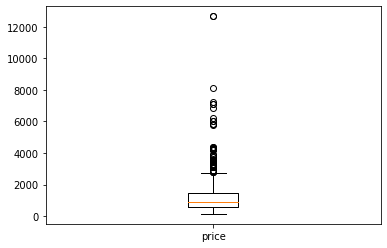

In [ ]:
plt.boxplot(y)
 
plt.xticks([1], ['price'])
plt.show()
plt.show()

* คำนวณ Q1, Q3, และ IQR

In [ ]:
Q1 = merge_df['price_after_discount'].quantile(0.25)
Q3 = merge_df['price_after_discount'].quantile(0.75)
IQR = Q3 - Q1
print('Q3 : ',Q3)
print('Q1 : ',Q1)
print('IQR : ',IQR)

Q3 :  1462.0
Q1 :  594.0
IQR :  868.0


* ทำการลบค่า Outlier โดยกำหนดให้ Price_after_discount มีค่าตั้งแต่ Q1 - (1.5*IQR) แต่ไม่เกิน Q3 + (1.5*IQR) ซึ่งเป็นช่วงที่ไม่มีค่า Outlier จะได้ตารางใหม่ชื่อ “merge_df_delete_outlier” 


In [ ]:
merge_df_delete_outlier=merge_df[(merge_df['price_after_discount'] >= Q1-(1.5*IQR)) 
                           & (merge_df['price_after_discount'] <= Q3 + (1.5*IQR))]

* นับจำนวนข้อมูล พบว่าเหลือเพียง 675 ข้อมูล


In [ ]:
len(merge_df_delete_outlier)

675

# 6. Models without Outliner

* แบ่งข้อมูลโดย train_test_split เป็น train : test = 80 : 20 โดยให้ X คือ ตัวแปรที่เป็นตัวเลขทั้งหมด คือ Distance, Score, Review_count, Employee_score, Facility_score, Clean_score, Comfort_score, Value_score, Location_score, Wifi_score, และ Main_facility_count และ y คือ Price_after_discount

In [ ]:
X =merge_df_delete_outlier[['distance','score','review_count','employee_score','facility_score','clean_score','comfort_score','value_score','location_score'
             ,'wifi_score','main_facility_count']]
y = merge_df_delete_outlier['price_after_discount']

* ใช้ stepwise_selection ในการเลือก features จะได้เป็น Value_score, Facility_score, และ Comfort_score


In [ ]:
result = stepwise_selection(X, y)
print('resulting features:')
print(result)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()


Add  clean_score                    with p-value 3.45813e-18
Add  value_score                    with p-value 3.2737e-22
Add  facility_score                 with p-value 1.61853e-20
Add  comfort_score                  with p-value 1.05157e-05
Drop clean_score                    with p-value 0.199269
resulting features:
['value_score', 'facility_score', 'comfort_score']


* แบ่งข้อมูลโดย train_test_split เป็น train : test = 80 : 20 โดยให้ X_select คือ Result
และ y คือ Price_after_discount


In [ ]:
X_select = merge_df_delete_outlier[result]
y = merge_df_delete_outlier['price_after_discount']
from sklearn.model_selection import train_test_split

X_train_select, X_test_select, y_train, y_test = train_test_split(X_select, y, test_size=0.2, random_state=42)

### Linear Regression

* ใช้ทำนายค่า X_test_select และ X_train_select โดยเรียกใช้ฟังก์ชั่น evaluate และ cross_val โดยที่จะเก็บค่า Mean Absolute Error, Mean Square Error, Root Mean Square Error, R2 Square และ Cross Validation เพิ่มในตาราง clean_results_select

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_select,y_train)
test_pred = lin_reg.predict(X_test_select)
train_pred = lin_reg.predict(X_train_select)

clean_results_select = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression(),X_train_select,y_train)]], 
                          columns=['Model', 'Mean Absolute Error', 'Mean Square Error', 'Root Mean Square Error', 
                                   'R2 Square', "Cross Validation"])

### Ridge Regression

* ใช้ทำนายค่า X_test_select และ X_train_select โดยเรียกใช้ฟังก์ชั่น evaluate และ cross_val โดยที่จะเก็บค่า Mean Absolute Error, Mean Square Error, Root Mean Square Error, R2 Square และ Cross Validation ในตาราง clean_results_select


In [ ]:
lm = Ridge()
lm.fit(X_train_select,y_train)
test_pred = lm.predict(X_test_select)
train_pred = lm.predict(X_train_select)

clean_results_select_add = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge(),X_train_select,y_train)]], 
                          columns=['Model', 'Mean Absolute Error', 'Mean Square Error', 'Root Mean Square Error', 
                                   'R2 Square', "Cross Validation"])
clean_results_select = clean_results_select.append(clean_results_select_add, ignore_index=True)

### Lasso Regression

* ใช้ทำนายค่า X_test_select และ X_train_select โดยเรียกใช้ฟังก์ชั่น evaluate และ cross_val โดยที่จะเก็บค่า Mean Absolute Error, Mean Square Error, Root Mean Square Error, R2 Square และ Cross Validation เพิ่มในตาราง clean_results_select

In [ ]:
model = Lasso(random_state=42)
model.fit(X_train_select, y_train)

test_pred = model.predict(X_test_select)
train_pred = model.predict(X_train_select)

clean_results_select_add= pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso(random_state=42),X_train_select,y_train)]], 
                          columns=['Model', 'Mean Absolute Error', 'Mean Square Error', 'Root Mean Square Error', 
                                   'R2 Square', "Cross Validation"])
clean_results_select = clean_results_select.append(clean_results_select_add, ignore_index=True)
clean_results_select

,Model,Mean Absolute Error,Mean Square Error,Root Mean Square Error,R2 Square,Cross Validation
0,Linear Regression,365.634897,217264.310446,466.116198,0.343722,0.322303
1,Ridge Regression,366.200691,218199.790171,467.118604,0.340897,0.322500
2,Lasso Regression,366.247583,218197.754829,467.116425,0.340903,0.322393


นำข้อมูลที่ตัด Outlier ทิ้ง (clean_results_select) กับข้อมูลที่ select features (results_df_select) มาเปรียบเทียบกัน


In [ ]:
results_df_select

,Model,Mean Absolute Error,Mean Square Error,Root Mean Square Error,R2 Square,Cross Validation
0,Linear Regression,538.457958,529805.057717,727.877090,0.449648,0.270901
1,Ridge Regression,539.481927,529626.272952,727.754267,0.449834,0.273311
2,Lasso Regression,538.916798,529689.467740,727.797683,0.449768,0.271553


เราเลือก Ridge Regression จาก results_df_select (Ridge Regression Select Data)  เนื่องจากมีค่า R2 Square สูงที่สุด 

# 7. Best Model

* เตรียม best model เพื่อจัดเก็บโมเดลที่ดีที่สุดของเรา
* แบ่งข้อมูลโดย train_test_split เป็น train : test = 80 : 20 โดยให้ X_select คือ Facility_score, Comfort_score, และ Value_score และ y_select คือ Price_after_discount จากตาราง merge_df
* ใช้ Ridge Regression ในการทำนายค่า X_test_select และ X_train_select  โดยเรียกใช้ฟังก์ชั่น print_evaluate ในการแสดงค่า Mean Absolute Error, Mean Square Error, Root Mean Square Error, และ R2 Square 


In [ ]:
#Best model again
X_select = merge_df[['facility_score','comfort_score','value_score']]
y_select = merge_df['price_after_discount']

X_train_select, X_test_select, y_train, y_test= train_test_split(X_select, y_select, test_size=0.2, random_state=42)

best_lm = Ridge()
best_lm.fit(X_train_select,y_train)
test_pred = best_lm.predict(X_test_select)
train_pred = best_lm.predict(X_train_select)

print('*** Ridge Regression Select Data ***')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

*** Ridge Regression Select Data ***
Test set evaluation:
_____________________________________
mean absolute error :: 539.481926569187
mean squared error: 529626.2729522642
root mean squared error: 727.7542668732792
R2 Square 0.4498338702727819
__________________________________
Train set evaluation:
_____________________________________
mean absolute error :: 618.8799746843001
mean squared error: 1114519.4064930854
root mean squared error: 1055.7080119488937
R2 Square 0.2972247501668782
__________________________________


แสดงผล เปรียบเทียบค่าจริง (True Values) และค่าทำนาย (Predicted Values)

In [ ]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': test_pred})

,True Values,Predicted Values
669,570.0,768.576039
33,502.0,1097.537071
549,1000.0,-1344.719311
199,547.0,1486.696336
264,1063.0,1318.175658
583,1163.0,2945.788843
39,1390.0,1557.946938
554,475.0,689.003931
585,1170.0,1861.394491
609,969.0,1009.540863


นับจำนวนข้อมูลใน X_train_select เพื่อเตรียมเก็บข้อมูลไป plot กราฟ ว่าจำนวนข้อมูลที่เราได้มานั้นเพียงพอหรือไม่

In [ ]:
len(X_train_select)

589

* ตั้งตัวแปรชื่อว่า ‘amount’ เพื่อเก็บจำนวนข้อมูล, ตัวแปร mse_list เพื่อเก็บข้อมูล Mean Square Error และตัวแปร rsquare_list เพื่อเก็บข้อมูล R Square

In [ ]:
amount=[]
rsquare_list=[]
mse_list=[]
for i in [a*10 for a in range(10,59)]:
    model = Ridge()
    model.fit(X_train_select[0:i],y_train[0:i])
    test_pred = model.predict(X_test_select)
    y_test_new=y_test
    result = evaluate(y_test_new, test_pred)
    rquare=result[3]
    mse=result[1]
    data = i
    amount.append(data)
    rsquare_list.append(rquare)
    mse_list.append(mse)

### Plot Graph

เพื่อดูความสัมพันธ์ของจำนวนข้อมูลว่า หากมีจำนวนข้อมูลที่เพิ่มมากขึ้น โมเดลจะดีขึ้นจริงหรือไม่และจำนวนข้อมูลที่เราหามาได้นั้นเพียงพอแล้วหรือยัง
* Plot จำนวนข้อมูล และค่า Mean Square Error เพื่อดูแนวโน้ม ซึ่งพบว่าถ้าหากมีจำนวนข้อมูลที่เพิ่มมากขึ้น ค่า Mean Square Error จะยิ่งมีแนวโน้มลดลง และเหมือนว่ายังสามารถลดลงได้อีก


Text(0, 0.5, 'mean square error')

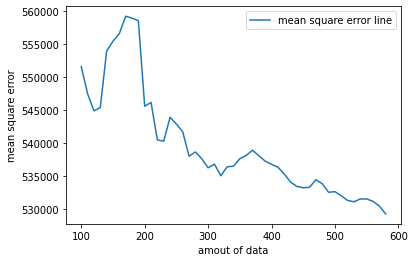

In [ ]:
plt.plot(amount,mse_list)
plt.legend(['mean square error line'])
plt.xlabel("amout of data")
plt.ylabel("mean square error")

* Plot จำนวนข้อมูลและค่า R Square เพื่อดูแนวโน้ม จากกราฟด้านล่างทำให้ทราบว่าหากมีข้อมูลในปริมาณที่เพิ่มขึ้น จะทำให้โมเดลมีค่าความแม่นยำมากขึ้น (ค่า R Square เพิ่มขึ้น)

Text(0, 0.5, 'r square')

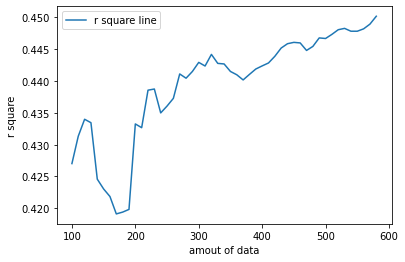

In [ ]:
plt.plot(amount,rsquare_list)
plt.legend(['r square line'])
plt.xlabel("amout of data")
plt.ylabel("r square")

# 8. Save Model

เพื่อให้สะดวกมากขึ้นในการเรียกใช้งานในครั้งถัดไป

In [ ]:
import pickle
filename = 'booking_model.sav'
pickle.dump(best_lm, open(filename, 'wb'))